In [20]:
import numpy as np
import gzip
import urllib.request
import pickle
import matplotlib.pyplot as plt

#Softmax Function

In [2]:
def softmax(a):
    return np.exp(a)/np.sum(np.exp(a))

#New version of softmax function 

In [4]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)


In [8]:
image_size = 28*28
dataset_dir = 'dataset'
url_base = 'http://jrkwon.com/data/ece5831/mnist/'

In [48]:
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

In [49]:
def _load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, image_size)

    return images


In [50]:
images = _load_images(dataset_dir + '/' + key_file['test_images'])

In [51]:
images.shape

(10000, 784)

In [52]:
idx = 1000

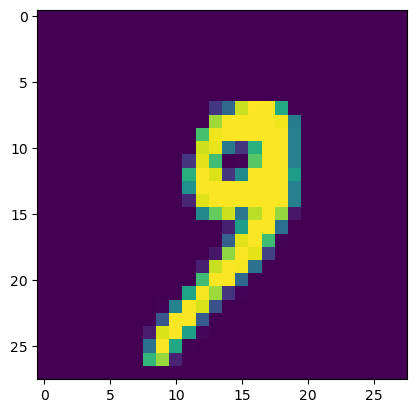

In [53]:
a = images[idx].reshape(28,28)
plt.imshow(a)

In [54]:
def _load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels

In [55]:
labels = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

In [56]:
labels[idx]

9

In [67]:
def _create_dataset():
    dataset = {}
    dataset['train_images'] = _load_images(f"{dataset_dir}/{key_file['train_images']}")
    dataset['train_labels'] = _load_labels(f"{dataset_dir}/{key_file['train_labels']}")
    dataset['test_images'] = _load_images(f"{dataset_dir}/{key_file['test_images']}")
    dataset['test_labels'] = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")
    
    return dataset

In [68]:
dataset = _create_dataset()

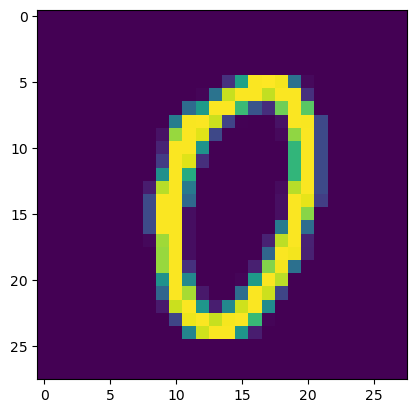

In [69]:
img = dataset['train_images'][idx].reshape(28,28)
plt.imshow(img)

 Label: 9


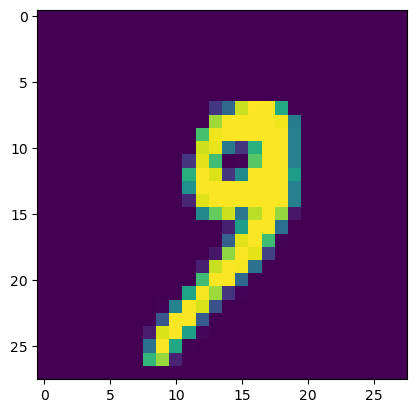

In [74]:
plt.imshow(dataset['test_images'][idx].reshape(28,28))
print(f" Label: {dataset['test_labels'][idx]}")

In [77]:
def _change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    
    return t

In [78]:
y = np.array([1, 0, 9, 8])
one_hot_y = _change_one_hot_label(y,10)

In [79]:
print(y)
print(one_hot_y)

[1 0 9 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
